# Linear regression summary

Linear regression is a method to predict quantitative response on the basis of a single predictor or multiple predictors by holding the assumption of a linear relationship between response and predictors. For each predictor, we give a coefficient to describe its weight. 

If we only have one predictor ${\bf x}$ and the response ${\bf y}$. Then the linear relationship between them can be formed as ${\bf y} := \beta_0 + \beta_1{\bf x}$ ( We give a weight $\beta_1$ for ${\bf x}$ to describe how ${\bf x}$ close to ${\bf y}$. Obvioulsy, if ${\bf x}=0$, then ${\bf y} = \beta_0$, ${\bf x}$ have no relationship with ${\bf y}$). When we have more than one predictor, ${\bf y} := \beta_0 + \beta_1{\bf x}_1 + \beta_2{\bf x}_2+\cdots+\beta_p{\bf x}_p$. For generalization, we form linear regression model as $f({\bf x}) = \beta_0 + \sum_{i=1}^{p}{\bf x_i}\beta_i$. 

Our purpose is to predict ${\bf Y}$ if given ${\bf X}=[{\bf 1},{\bf x_1}, {\bf x_2}, \cdots, {\bf x_p}]$. Thus, the first task is to estimate unknown coefficients $\beta$ ( $\beta=[\beta_0, \beta_1, \cdots, \beta_p]^T$). We may estimate the coefficient by a set of training date $({\bf x_1},{\bf y_1}), \cdots, ({\bf x_p},{\bf y_p})$, where each ${\bf x_i} = (x_{i1}, x_{i2},\cdots, x_{ip})$. Noticed that each observation pair is assumed as an independent random draws from their population. Once we got the estimates $\hat{\beta}$, the prediction of ${\bf Y}$ can be computed by $\hat{\bf Y} = {\bf X}\hat\beta$.

The most common method of coefficient estimation is __least squares__, which is to obtain $\beta$ by minimizing the __residual sum of squares__. So what is the residual sum of square (RSS)?

We define RSS as $RSS = \sum_{i=1}^{n}(y_i - \beta_0 - \sum_{j=1}^{p}x_j\beta_j)^2$ or a quadratic function $RSS(\beta)=({\bf y}-{\bf X}\beta)^T({\bf y}-{\bf X}\beta)$, where ${\bf X}$ is a $n \times (p+1)$ matrix, $n$ refers to the number of observations and $p+1$ refers to the number of parameters. Differentiating the quadratic function with respect to $\beta$ and let it euqal to $0$, we got:

${\bf X}^T({\bf y} - {\bf X}\beta) = 0$. 

Thus,

$\hat{\beta} = ({\bf X}^T{\bf X})^{-1}{\bf X}^T{\bf y}$. Noticed that the columns of ${\bf X}$ is linearly independent so that it is a full-rank matrix. In this case, ${\bf X}^T{\bf X}$ is positive definite and thus we can calculate $\hat{\beta}$ directly. ($\hat{\beta}$ should be under the same distribution as ${\bf y}$)

We assume that the true relationship between predictors and response takes the from ${\bf y} = f({\bf x}) + \epsilon$, where $\epsilon \backsim N(0,\sigma^2)$. Therefore, ${\bf y}$ is also random varibale of normal distribution and $Var({\bf y}) = Var(\epsilon) = \sigma^2$.

Then, we know that $Var(\hat{\beta}) = Var(({\bf X}^T{\bf X})^{-1}{\bf X}^T{\bf y}) = ({\bf X}^T{\bf X})^{-1}{\bf X}^TVar({\bf y}){\bf X}({\bf X}^T{\bf X})^{-1}=({\bf X}^T{\bf X})^{-1}\sigma^2$. 

$E(\hat{\beta})= E(({\bf X}^T{\bf X})^{-1}{\bf X}^T{\bf y})=E(({\bf X}^T{\bf X})^{-1}{\bf X}^T{\bf X}{\beta})=\beta$

Thus, ${\hat\beta} \backsim N(\beta,({\bf X}^T{\bf X})^{-1}\sigma^2)$ and this is a multivariate normal distribution.

Here is an example in the book ___Machine Learning in Action___. We first take a look at the data.

In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [6]:
df=pd.read_csv('D:/math/book/data mining/ML/machinelearninginaction/Ch08/ex0.txt', sep='\t',header=None)
df.head()

,0,1,2
0,1.0,0.067732,3.176513
1,1.0,0.427810,3.816464
2,1.0,0.995731,4.550095
3,1.0,0.738336,4.256571
4,1.0,0.981083,4.560815


In [40]:
dataMat=df.loc[:,0:1].as_matrix()
print(dataMat.shape)
label=df[2].as_matrix()

(200L, 2L)


In [58]:
def standReg(x,y):
    xTx=np.dot(x.T,x)
    if np.linalg.det(xTx) == 0.0:
        print('The inverse matrix does not exist')
        return
    return np.dot(np.linalg.inv(xTx), np.dot(x.T,y))

In [60]:
beta_=standReg(dataMat,label)
print('We got the estimates of beta:')
print(beta_)

We got the estimates of beta:
[ 3.00774324  1.69532264]


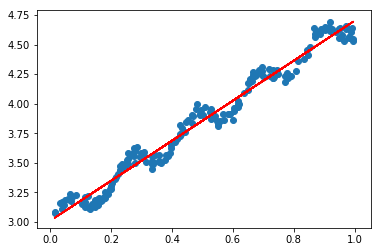

In [70]:
plt.scatter(dataMat[:,1],label)
plt.plot(dataMat[:,1],np.dot(dataMat, beta_), color='r')
fig=plt.gcf()
plt.show()

In the above example, we have only one predictors. It can be see all the values of the first column of _dataMat_ are 1. Because ${\bf X}\beta=[1 \ {\bf x_1}][\beta_0 \ \beta_1]^T = \beta_0 + \beta_1{\bf x_1}$. Thus we got $\beta_0 = 3.00774324$ and $\beta_1=1.69532264$. It can be seen that we make use of all observations to train the coefficients. But in general we would not do this.

In general, we divide the data into two set, traning data and test data. The following example uses __sklearn__ library

In [124]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV, Ridge, LassoCV, Lasso

In [144]:
df=pd.read_csv('D:/math/book/data mining/ML/dataset/CCPP/Folds5x2_pp.csv')
x = df[['AT', 'V', 'AP', 'RH']]
y = df[['PE']]


In [154]:
def linear_regression(x,y):
    dataMat_train, dataMat_test, label_train, label_test = train_test_split(x, y, test_size=0.25, random_state=42)
    
    linreg = linear_model.LinearRegression(fit_intercept =True) #We do not fit intercept becasue the first column of dataMat is 1
    linreg.fit(dataMat_train,label_train)
    print(linreg.coef_)
    
    label_pred = linreg.predict(dataMat_test)
    mse = mean_squared_error(label_test, label_pred)
    print(mse)

In [155]:
linear_regression(x,y)

[[-1.97852801 -0.23403882  0.05833255 -0.15906102]]
20.0714469653


# More about linear regression

The __least squares__ produces the estimates of $\beta$ for getting future respones with ${\bf x}$. This method gives us estimates often have low bias but high variance. It is not what we expect. We expect an estimate with low bias and low variace. By doing so we sacrifice a liitle bit of bias to reduce the variance of the preicted value. On the other hand, least squares make use all of the predictors. But when the number of predictors is large, we prefer a smaller subset predictors which exhibit the strongest effects.

__First__, we see how close $\hat{\bf Y}$ to ${\bf Y}$.

If $\mu$ is the mean of ${\bf Y}$, we use sample mean $\hat\mu$ to estimate the $\mu$. We always hope that the estimate is unbias such that $E(\hat\mu) = \mu$. Then how far off will that single estimate of $\hat\mu$ be? We could answer this question by computing the variance of $\hat\mu$.

Since $Var(\hat\mu)=Var(\frac{1}{n}\sum_{i=1}^{n}y_i)=\frac{1}{n^2}Var(\sum_{i=1}^{n}y_i)=\frac{1}{n^2}\ n\sigma^2=\frac{\sigma^2}{n}$. It tells us, the large the number of observations $n$, the less the value of variance of $\hat\mu$. Thus, we conclude that if we want to reduce the variance, one of the method is to increase the number of observations.

__Sechond__, we give two shinkage methods which could reduce the variance, __Rigdge Regression__ and __The Lasso__

### Ridge Regression

Ridge regression estimate the coefficient by minimizing a penalized RSS:

$\begin{equation}
    RSS(\beta_{rigde})=({\bf y}-{\bf X}\beta)^T({\bf y}-{\bf X}\beta) + \lambda\beta^T\beta
\end{equation}$

where $\beta^T\beta$ is the a norm-2 regularization. $\lambda$ is the regularization parameter to balance two terms. Differentiating the $RSS(\beta)$ with respect to $\beta$ and let it euqal to $0$, we got $\hat\beta_{rigde}=({\bf X}^T{\bf X} + \lambda{\bf I})^{-1}{\bf X}^T{\bf y}$. Then $Var(\hat{\bf y}_{ridge})=Var({\bf X}\hat{\beta}_{ridge}) = {\bf X}({\bf X}^T{\bf X} + \lambda{\bf I})^{-1}{\bf X}^T\sigma^2$.

Comparing with the variance of $Var(\hat{\bf y}) = {\bf X}({\bf X}^T{\bf X})^{-1}{\bf X}^T\sigma^2$, we see that the variance of estimate is reduced.

Notied that different $\lambda$ produce a different set of $\beta$. Thus, a good value for $\lambda$ will be selected by cross-validation.

Another thing in ridge regression. Different scaling of predictor will not effect ${\bf X}_j\hat\beta_j$ in least squares. But it has impace in ridge regression because the $L_2$ penalty. Thus, it is best to apply ridge regression after standardizing the predictors.

### The Lasso

Instead of $L_2$ penlty, the lasso uses $L_1$ penlty. Its estimate is defined by $\hat\beta_lasso = argmin_{\beta}\{\frac{1}{2}\sum_{i=1}^{n}(y_i - \beta_0 -\sum_{j=1}^{p}x_ij\beta_j)^2 + \lambda\sum_{j=1}^{p}|\beta_j|\}$. This latter constraint is non-convex, and there is no closed form expression. Although the lasso shrinks the coefficient estimates towards zero. But the $L_1$ penalty has the effect of forcing some of the coefficient estimates to be exactly equal to zero when the tuning parameter $\lambda$ is sufficiently large. Thus, the lasso performs variable selection.

There are two algorithm to solve the lasso, coordinate descent and least angle regression.(This part will be added later)

In [184]:
def ridge_regression(x,y):
    dataMat_train, dataMat_test, label_train, label_test = train_test_split(x, y, test_size=0.25, random_state=42)
    
    #select the value of parameter by cross validation.
    alpha_Mat= np.logspace(-10,10,10)
    ridgecv = RidgeCV(alphas=alpha_Mat, fit_intercept=True,cv=10)
    ridgecv.fit(dataMat_train, label_train)
    
    ridge = Ridge(alpha=ridgecv.alpha_,fit_intercept=True)
    ridge.fit(dataMat_train,label_train)
    print(ridgecv.alpha_)
    
    return ridge.coef_ , mean_squared_error(label_test, ridge.predict(dataMat_test))

In [185]:
a,b=ridge_regression(x,y)
print(a)
print(b)

12.9154966501
[[-1.9781638  -0.23417727  0.05842311 -0.15899963]]
20.0714198433


In [186]:
def lasso_regression(x,y):
    dataMat_train, dataMat_test, label_train, label_test = train_test_split(x, y, test_size=0.25, random_state=42)
    
    alpha_Mat= np.logspace(-10,10,10)
    lassocv=LassoCV(alphas=alpha_Mat,fit_intercept=True,cv=10)
    lassocv.fit(dataMat_train, label_train)
    
    lasso=Lasso(alpha=lassocv.alpha_,fit_intercept=True)
    lasso.fit(dataMat_train,label_train)
    print(lassocv.alpha_)
    return lasso.coef_, mean_squared_error(label_test, lasso.predict(dataMat_test))

In [187]:
a,b=lasso_regression(x,y)
print(a)
print(b)

0.000464158883361
[-1.97858225 -0.23401902  0.05830488 -0.15906742]
20.07145931
